In [1]:
import numpy as np
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:

from sklearn.mixture import GaussianMixture
# from sklearn.mixture import GMM
from sklearn import mixture

In [4]:
# https://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html

In [5]:
from matplotlib import pyplot as plt

In [6]:
import cv2

In [7]:
import deposito_watcher.api as api
import deposito_watcher.video as vi

In [8]:
# # from IPython.display import display, clear_output
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

In [9]:
# https://www.youtube.com/watch?v=DODphRRL79c&ab_channel=MachineLearningTV

In [10]:
df = pd.read_csv("1_all.csv")
df


,Unnamed: 0,median,mean,sum
0,0,2.343759,2.343759,2.343759
1,1,2.282046,2.282046,2.282046
2,2,2.739524,2.739524,2.739524
3,3,2.807419,2.807419,2.807419
4,4,3.555557,3.555557,3.555557
...,...,...,...,...
3360,3360,1.792624,1.792624,1.792624
3361,3361,1.479563,1.479563,1.479563
3362,3362,1.479563,1.479563,1.479563
3363,3363,1.885496,1.885496,1.885496


In [11]:
df_30 = pd.read_csv("30_all.csv")
df_30


,Unnamed: 0,median,mean,sum
0,29,2.944884,3.007589,90.227675
1,30,3.082349,3.053957,91.618699
2,31,3.131879,3.105608,93.168235
3,32,3.163876,3.119168,93.575052
4,33,3.163876,3.122213,93.666386
...,...,...,...,...
3331,3360,2.008956,1.962278,58.868345
3332,3361,2.002092,1.943444,58.303314
3333,3362,1.969796,1.922560,57.676792
3334,3363,1.937499,1.915207,57.456203


In [12]:
df_60 = pd.read_csv("60_all.csv")
df_60

,Unnamed: 0,median,mean,sum
0,59,2.752713,2.925106,175.506381
1,60,2.767978,2.939975,176.398500
2,61,2.789900,2.956468,177.388109
3,62,2.789900,2.947792,176.867506
4,63,2.767978,2.942268,176.536088
...,...,...,...,...
3301,3360,1.930948,1.763417,105.805022
3302,3361,1.930948,1.768333,106.099968
3303,3362,1.930948,1.773384,106.403063
3304,3363,1.930948,1.785166,107.109988


In [13]:
df_90 = pd.read_csv("90_all.csv")
df_90

,Unnamed: 0,median,mean,sum
0,89,2.869234,2.947251,265.252555
1,90,2.885706,2.955097,265.958724
2,91,2.899663,2.963912,266.752065
3,92,2.922242,2.972756,267.548046
4,93,2.948071,2.981865,268.367855
...,...,...,...,...
3271,3360,1.937499,1.803410,162.306875
3272,3361,1.937499,1.807223,162.650075
3273,3362,1.937499,1.809521,162.856909
3274,3363,1.937499,1.815717,163.414535


In [14]:
def gerera_models(df,name, qnt= 14):
    X = df[name]
    x_a = np.array(X)
    s = x_a.reshape(-1, 1)
    N = np.arange(1, qnt)
    models = [None for i in range(len(N))]
    for i in range(len(N)):
        print(i)
        models[i] = GaussianMixture(N[i]).fit(s)
    AIC = [m.aic(s)   for m in models]
    BIC = [m.bic(s)   for m in models]
    LL  = [m.score(s) for m in models] 
    best_aic = np.argmin(AIC)
    best_bic = np.argmin(BIC)
    b_model_gaussian = models[best_bic]
    return {'name':name,'df_colun': df[name], 'ls_models':models, 
            'AIC': AIC, 'BIC':BIC, 'LL': LL, 'qnt':qnt,
           'best_aic': best_aic, 'best_bic': best_bic, 'best_model':b_model_gaussian }



def gera_modelos(df):

    ls_models =[]
    # ls_df_colum = [df['Vd_m_sum_nor'], df['dif_max_min_nor'], df['Vd_m_median_nor']]
    ls_df_name = ['Vd_m_sum_nor','dif_max_min_nor', 'Vd_m_median_nor' ]
    for name in ls_df_name:
        ls_models.append(gerera_models(df, name, 25))
        
    return ls_models

def gera_modelos_a(df):

    ls_models =[]
    # ls_df_colum = [df['Vd_m_sum_nor'], df['dif_max_min_nor'], df['Vd_m_median_nor']]
    ls_df_name = ['median','mean' ]
    for name in ls_df_name:
        ls_models.append(gerera_models(df, name, 15))
        
    return ls_models

In [15]:
ls_models_1 = gera_modelos_a(df)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [16]:
ls_models_30 = gera_modelos_a(df_30)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [17]:
ls_models_60 = gera_modelos_a(df_60)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [18]:
ls_models_90 = gera_modelos_a(df_90)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [19]:
# ls_models
def plot_bic_models(ax, ls_models, title):
    for m in ls_models:
        AIC = m['AIC']
        BIC = m['BIC']
        N = list(range(len(m['AIC'])))
    #     ax.plot(N, AIC, '-k', label=f'AIC_{m.name}')
    #     ax.plot(N, BIC, '--k', label=f'BIC_{m.name}')
    #     ax.plot(N, AIC, label=f'AIC_{m["name"]}')
        ax.plot(N, BIC, label=f'BIC_{m["name"]}')
        ax.set_xlabel('n. components')
        ax.set_ylabel('information criterion')
        ax.legend(loc=1)
        ax.set_title(title)
        
def plot_ll_models(ax, ls_models, title):
    for m in ls_models:
        LL = m['LL']
    #     BIC = m['BIC']
        N = list(range(len(m['LL'])))
    #     ax.plot(N, AIC, '-k', label=f'AIC_{m.name}')
    #     ax.plot(N, BIC, '--k', label=f'BIC_{m.name}')
    #     ax.plot(N, AIC, label=f'AIC_{m["name"]}')
        ax.plot(N, LL, label=f'LL{m["name"]}')
        ax.set_xlabel('n. components')
        ax.set_ylabel('information criterion')
        ax.legend(loc=3)

In [20]:
# s = gerera_models(df, "@form", 15)
# s

In [21]:
# s["ls_models"]

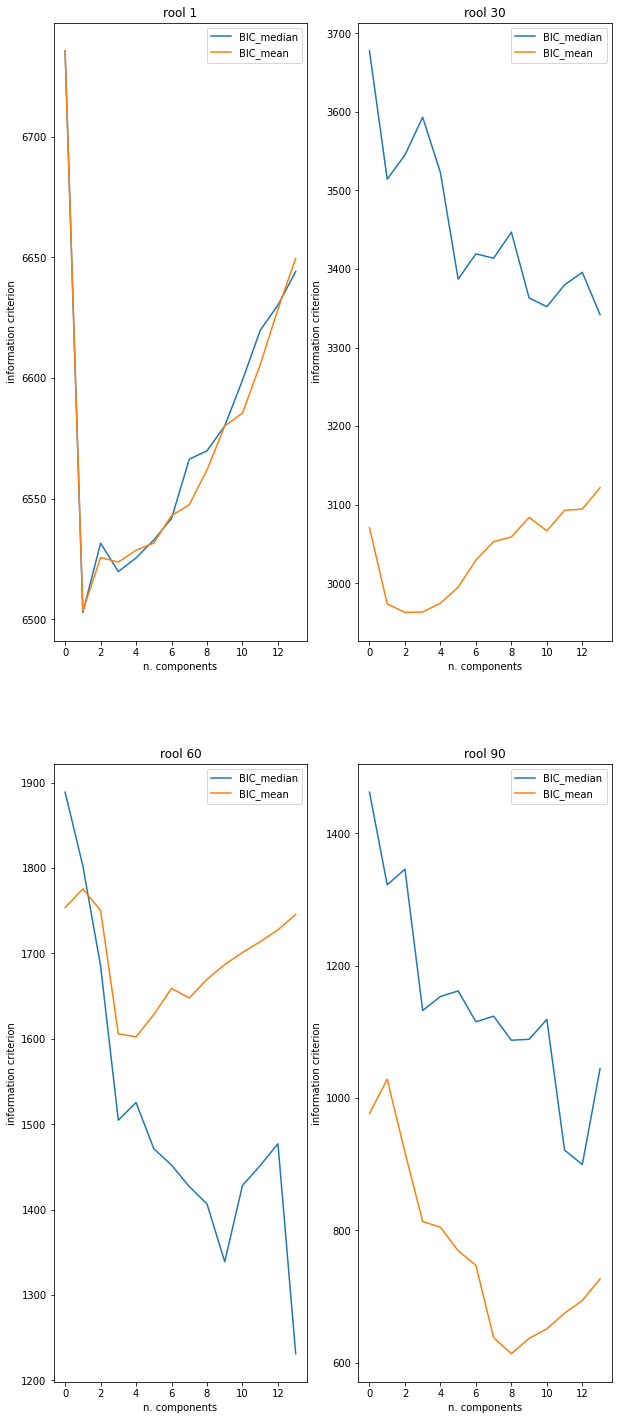

In [22]:
fig = plt.figure(figsize=(10, 25))
ax = fig.subplots(nrows=2, ncols=2)

plot_bic_models(ax[0,0], ls_models_1, "rool 1") 
plot_bic_models(ax[0,1], ls_models_30, "rool 30") 
plot_bic_models(ax[1,0], ls_models_60, "rool 60") 
plot_bic_models(ax[1,1], ls_models_90, "rool 90") 

In [23]:
fig.savefig("train.jpg")

C:\Users\User\.conda\envs\cripto37\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == "":


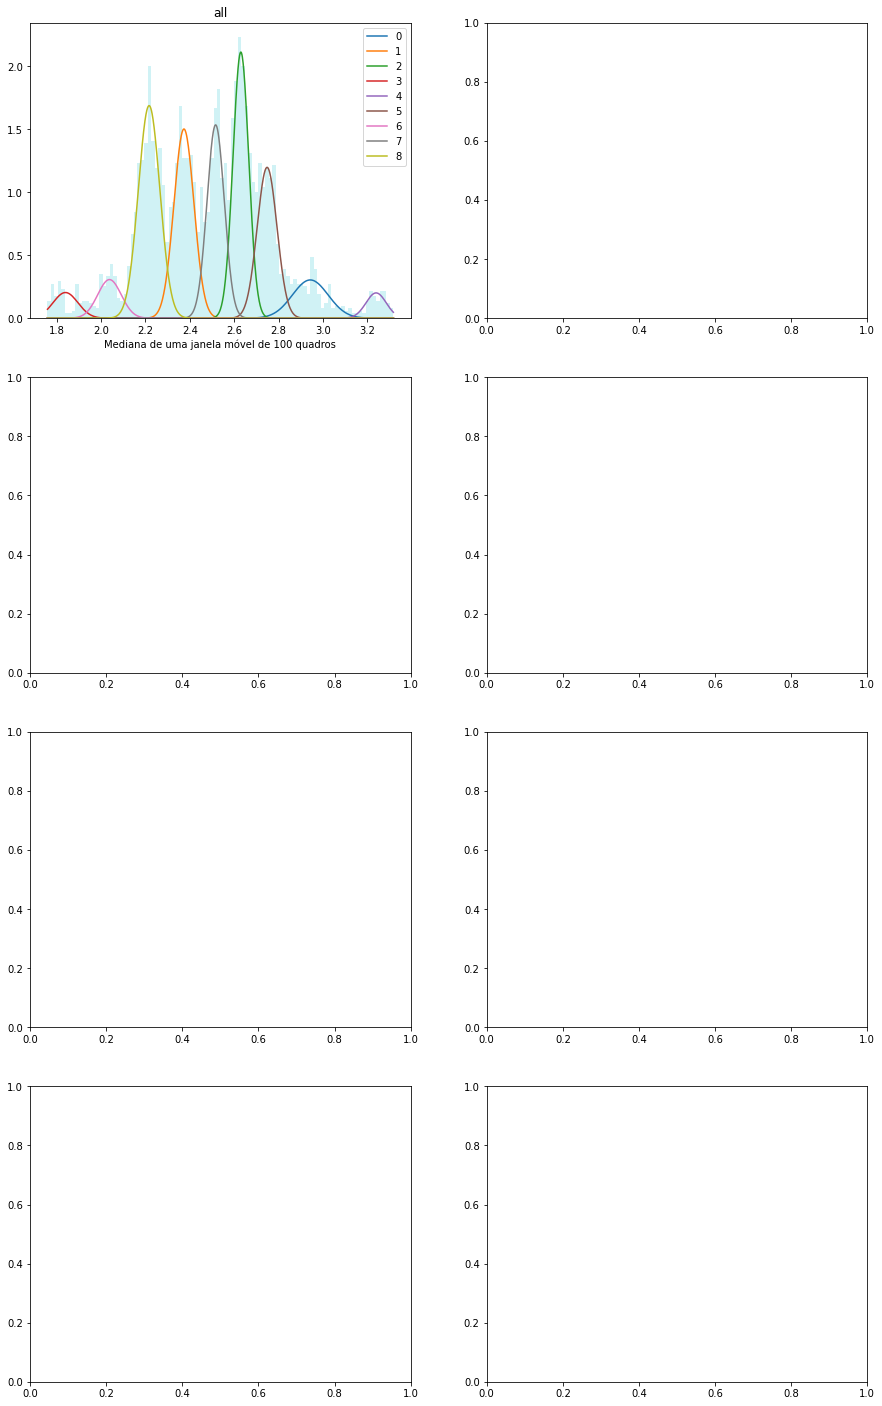

In [25]:
def plt_gaussianas(ax, mo_dic, numero_modelo, title):
#     numero_modelo = 8
#     mo_dic = ls_models[2]
    g = mo_dic['ls_models'][numero_modelo]
    bic_m = mo_dic['BIC'][numero_modelo]
    weights = g.weights_
    means = g.means_
    covars = g.covariances_
#     print(bic_m, weights, means, covars)
    
    x = mo_dic['df_colun']
    f = np.ravel(x).astype(np.float)
    f = f.reshape(-1,1)
#     plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
    
    f_axis = f.copy().ravel()
    f_axis.sort()
    for i, valor in enumerate(g.weights_):
        ax.plot(f_axis,weights[i]*stats.norm.pdf(f_axis,means[i],np.sqrt(covars[i])).ravel(), label= f'{i}')
        ax.legend()
    # plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='red')
    # plt.plot(f_axis,weights[2]*stats.norm.pdf(f_axis,means[2],np.sqrt(covars[2])).ravel(), c='red')
    ax.hist(f, bins=100, histtype='bar', density=True, alpha=0.2)
    ax.set_xlabel("Mediana de uma janela móvel de 100 quadros")
    ax.set_title(title)
    
fig = plt.figure(figsize=(15, 25))
ax = fig.subplots(nrows=4, ncols=2)
plt_gaussianas(ax[0,0], ls_models_90[1], ls_models_90[1]["best_bic"], "all")

In [ ]:
df['Vd_sum'].max()

In [ ]:
df['Vd_sum'].min()

In [ ]:
# VIDEO_PATH = "D:/dados_gian_mongo_arrumados/arquivos_videos/"
# juncao["id_video"]

In [ ]:
# tocador = vi.Tocador_video(VIDEO_PATH, juncao["id_video"])
# # for imagem in tocador.get_video_gerador(100,300):
# #     np_image = vi.c_image_to_np(imagem)
# #     cv2.imshow("teste", np_image)
# #     k = cv2.waitKey(int(1/30*1000))
# # cv2.destroyAllWindows()

In [ ]:
# img = tocador.get_quadro_plt(146)
# plt.imshow(img)
# plt.show()

In [ ]:
# vi.c_64_2_image(tocador.get_quadro(146))

In [ ]:
# tocador.get_quadro(146)

In [ ]:
# img = vi.c_64_2_image(tocador.get_quadro(146))

In [ ]:
# def map_juncao_quadro_img(id_j, quadro):
#     r_acho, juncao = api.get_juncao_by_hash(id_j)
#     tocador = vi.Tocador_video(VIDEO_PATH, juncao['id_video']) #juncao["id_video"])
#     img = tocador.get_quadro_plt(quadro)
#     return img

In [ ]:
# vi.conver_string_opencv_img(vi.Tocador_video(VIDEO_PATH, juncao["id_video"]).get_quadro(143))

In [ ]:
# df = pd.read_csv("dados_flx25_controle_machos_femeas.csv")

In [ ]:
# df

In [ ]:
# df_limpo = df[df['@Van'] != 0]
# df_limpo

In [ ]:
# df_limpo['id'] = [i for i in range(len(df_limpo['@Vd']))]

In [ ]:
# def map_juncao_quadro_img(row):
#     r_acho, juncao = api.get_juncao_by_hash(row['id_j'])
#     if r_acho:
#         tocador = vi.Tocador_video(VIDEO_PATH, juncao['id_video']) #juncao["id_video"])
#         img = tocador.get_quadro_plt(row['@f'])
#         return img
#     else:
#         print(juncao, row['dosagem'], row['sexo'], row['unidade'] )
#         return None


In [ ]:
# ls = df_limpo.apply(map_juncao_quadro_img, axis=1)

In [ ]:
# df_limpo.iloc[0:10]

In [ ]:
# df_l_s = df_limpo[df_limpo["categoria"] == "Swimming"]
# x_s = df_limpo['@Vd']
# x_s = df_limpo['id']               

In [ ]:
# df_l_im = df_limpo[df_limpo["categoria"] == "Immobility"]
# x_s = df_limpo['@Vd']
# x_s = df_limpo['id'] 

In [ ]:
# X = df_limpo['@Vd']
# tempo = [i for i in range(len(df_limpo['@Vd']))]



In [ ]:
# X = df_limpo['@Vd']
# tempo = [i for i in range(len(df_limpo['@Vd']))]

In [ ]:
# fig = plt.figure(figsize=(10, 5))
# plt.scatter(tempo, X)
# plt.scatter(df_l_s['id'], df_l_s['@Vd'])
# plt.scatter(df_l_im['id'], df_l_im['@Vd'])

In [ ]:
# for i,row in df_limpo.iloc[0:200].iterrows():
    
# #     print(row)
#     img = map_juncao_quadro_img(row['id_j'], row['@f'])
#     plt.imshow(img)
#     plt.show()
#     k = cv2.waitKey(int(1/30*1000))
# #     clear_output(wait=True)

In [ ]:
# def f(x):
#     return x
# interact(f, x=10);

In [ ]:
# @interact(x=True, y=1.0)
# def g(x, y):
#     return (x, y)

In [ ]:
# fig = plt.figure(figsize=(10, 5))
# qnt = 100
# inicio = 0
# plt.scatter(tempo[inicio:qnt], X[inicio:qnt], label="todos")
# plt.scatter(df_l_s['id'][inicio:qnt], df_l_s['@Vd'][inicio:qnt], label="Swimming")
# plt.scatter(df_l_im['id'][inicio:qnt], df_l_im['@Vd'][inicio:qnt], label="Immobility")
# plt.legend()

In [ ]:
df_macho         = df[(df['sexo'] == "macho")]
df_femea         = df[(df['sexo'] == "femea")]
df_macho_veiculo = df[(df['sexo'] == "macho") & (df['dosagem'] == 'veiculo')]
df_macho_flx25mg = df[(df['sexo'] == "macho") & (df['dosagem'] == 'flx2.5mg')]
df_femea_veiculo = df[(df['sexo'] == "femea") & (df['dosagem'] == 'veiculo')]
df_femea_flx25mg = df[(df['sexo'] == "femea") & (df['dosagem'] == 'flx2.5mg')]

In [ ]:
df_femea_flx25mg

In [ ]:
# df['Vd_m_sum'].dropna()

In [ ]:
# X = df['Vd_m_sum']

In [ ]:
# X = df['Vd_m_sum_nor'] # df['Vd_m_sum_nor'] #
# x_a = np.array(X)
# s = x_a.reshape(-1, 1)

# Gerando models

In [ ]:
def gerera_models(df,name, qnt= 14):
    X = df[name]
    x_a = np.array(X)
    s = x_a.reshape(-1, 1)
    N = np.arange(1, qnt)
    models = [None for i in range(len(N))]
    for i in range(len(N)):
        print(i)
        models[i] = GaussianMixture(N[i]).fit(s)
    AIC = [m.aic(s)   for m in models]
    BIC = [m.bic(s)   for m in models]
    LL  = [m.score(s) for m in models] 
    best_aic = np.argmin(AIC)
    best_bic = np.argmin(BIC)
    b_model_gaussian = models[best_bic]
    return {'name':name,'df_colun': df[name], 'ls_models':models, 
            'AIC': AIC, 'BIC':BIC, 'LL': LL, 'qnt':qnt,
           'best_aic': best_aic, 'best_bic': best_bic, 'best_model':b_model_gaussian }


def gera_modelos(df):

    ls_models =[]
    # ls_df_colum = [df['Vd_m_sum_nor'], df['dif_max_min_nor'], df['Vd_m_median_nor']]
    ls_df_name = ['Vd_m_sum_nor','dif_max_min_nor', 'Vd_m_median_nor' ]
    for name in ls_df_name:
        ls_models.append(gerera_models(df, name, 25))
        
    return ls_models

In [ ]:
dic_models = {}

dic_models['all'] = gera_modelos(df)
dic_models['all_macho'] = gera_modelos(df_macho)
dic_models['all_femea'] = gera_modelos(df_femea)
dic_models['df_macho_veiculo'] = gera_modelos(df_macho_veiculo)
dic_models['df_macho_tratado'] = gera_modelos(df_macho_flx25mg)
dic_models['df_femea_veiculo'] = gera_modelos(df_femea_veiculo)
dic_models['df_femea_tratado'] = gera_modelos(df_femea_flx25mg)


# ls_models[2]

In [ ]:
from joblib import dump, load


In [ ]:
dump(dic_models, 'ls_modelos_treinados.joblib') 

# Inicio da analise dos modelos

In [ ]:
# ls_models
def plot_bic_models(ax, ls_models, title):
    for m in ls_models:
        AIC = m['AIC']
        BIC = m['BIC']
        N = list(range(len(m['AIC'])))
    #     ax.plot(N, AIC, '-k', label=f'AIC_{m.name}')
    #     ax.plot(N, BIC, '--k', label=f'BIC_{m.name}')
    #     ax.plot(N, AIC, label=f'AIC_{m["name"]}')
        ax.plot(N, BIC, label=f'BIC_{m["name"]}')
        ax.set_xlabel('n. components')
        ax.set_ylabel('information criterion')
        ax.legend(loc=1)
        ax.set_title(title)
        
def plot_ll_models(ax, ls_models, title):
    for m in ls_models:
        LL = m['LL']
    #     BIC = m['BIC']
        N = list(range(len(m['LL'])))
    #     ax.plot(N, AIC, '-k', label=f'AIC_{m.name}')
    #     ax.plot(N, BIC, '--k', label=f'BIC_{m.name}')
    #     ax.plot(N, AIC, label=f'AIC_{m["name"]}')
        ax.plot(N, LL, label=f'LL{m["name"]}')
        ax.set_xlabel('n. components')
        ax.set_ylabel('information criterion')
        ax.legend(loc=3)

In [ ]:

# plot 2: AIC and BIC
fig = plt.figure(figsize=(10, 25))
ax = fig.subplots(nrows=4, ncols=2)

plot_bic_models(ax[0,0], dic_models["all"], "all")

plot_bic_models(ax[1,0], dic_models["all_macho"], "all_macho")
plot_bic_models(ax[1,1], dic_models["all_femea"],"all_femea")

plot_bic_models(ax[2,0], dic_models["df_macho_veiculo"], "df_macho_veiculo")
plot_bic_models(ax[2,1], dic_models["df_macho_tratado"],"df_macho_tratado")

plot_bic_models(ax[3,0], dic_models["df_femea_veiculo"], "df_femea_veiculo")
plot_bic_models(ax[3,1], dic_models["df_femea_tratado"],"df_femea_tratado")



# dic_models['all_femea'] = gera_modelos(df_femea)
# dic_models['df_macho_veiculo'] = gera_modelos(df_macho_veiculo)
# dic_models['df_macho_tratado'] = gera_modelos(df_macho_flx25mg)
# dic_models['df_femea_veiculo'] = gera_modelos(df_femea_veiculo)
# dic_models['df_femea_tratado'] = gera_modelos(df_femea_flx25mg)



# for m in ls_models:
#     AIC = m['AIC']
#     BIC = m['BIC']
#     N = list(range(len(m['AIC'])))
# #     ax.plot(N, AIC, '-k', label=f'AIC_{m.name}')
# #     ax.plot(N, BIC, '--k', label=f'BIC_{m.name}')
# #     ax.plot(N, AIC, label=f'AIC_{m["name"]}')
#     ax.plot(N, BIC, label=f'BIC_{m["name"]}')
#     ax.set_xlabel('n. components')
#     ax.set_ylabel('information criterion')
#     ax.legend(loc=1)
    
    
# AIC = [m.aic(s) for m in models]
# BIC = [m.bic(s) for m in models]


In [ ]:
def plt_gaussianas(ax, mo_dic, numero_modelo, title):
#     numero_modelo = 8
#     mo_dic = ls_models[2]
    g = mo_dic['ls_models'][numero_modelo]
    bic_m = mo_dic['BIC'][numero_modelo]
    weights = g.weights_
    means = g.means_
    covars = g.covariances_
#     print(bic_m, weights, means, covars)
    
    x = mo_dic['df_colun']
    f = np.ravel(x).astype(np.float)
    f = f.reshape(-1,1)
#     plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
    
    f_axis = f.copy().ravel()
    f_axis.sort()
    for i, valor in enumerate(g.weights_):
        ax.plot(f_axis,weights[i]*stats.norm.pdf(f_axis,means[i],np.sqrt(covars[i])).ravel(), label= f'{i}')
        ax.legend()
    # plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='red')
    # plt.plot(f_axis,weights[2]*stats.norm.pdf(f_axis,means[2],np.sqrt(covars[2])).ravel(), c='red')
    ax.hist(f, bins=100, histtype='bar', density=True, alpha=0.2)
    ax.set_xlabel("Mediana de uma janela móvel de 100 quadros")
    ax.set_title(title)
    #     f
    
    
    

In [ ]:
# o 2 é pq é o ultimo descritor, modelo = numero de guassianas + 1
fig = plt.figure(figsize=(15, 25))
ax = fig.subplots(nrows=4, ncols=2)


# plt_gaussianas(ax[0,0] , dic_models["df_macho_veiculo"][2], 9)
# plt_gaussianas(ax[0,1] , dic_models["df_femea_veiculo"][2], 9)


plt_gaussianas(ax[0,0], dic_models["all"][2], 9, "all")

plt_gaussianas(ax[1,0], dic_models["all_macho"][2], 9, "all_macho")
plt_gaussianas(ax[1,1], dic_models["all_femea"][2], 9,"all_femea")

plt_gaussianas(ax[2,0], dic_models["df_macho_veiculo"][2], 9, "df_macho_veiculo")
plt_gaussianas(ax[2,1], dic_models["df_macho_tratado"][2], 9,"df_macho_tratado")

plt_gaussianas(ax[3,0], dic_models["df_femea_veiculo"][2], 9, "df_femea_veiculo")
plt_gaussianas(ax[3,1], dic_models["df_femea_tratado"][2], 9, "df_femea_tratado")


## FALTA ARRUMAR O CLASSIFICADOR.

In [ ]:
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# for m in ls_models:
#     LL = m['LL']
# #     BIC = m['BIC']
#     N = list(range(len(m['LL'])))
# #     ax.plot(N, AIC, '-k', label=f'AIC_{m.name}')
# #     ax.plot(N, BIC, '--k', label=f'BIC_{m.name}')
# #     ax.plot(N, AIC, label=f'AIC_{m["name"]}')
#     ax.plot(N, LL, label=f'LL{m["name"]}')
#     ax.set_xlabel('n. components')
#     ax.set_ylabel('information criterion')
#     ax.legend(loc=3)

In [ ]:
# ls_models[2]['LL']

In [ ]:
# m = ls_models[0]
# #     BIC = m['BIC']
# N = list(range(len(m['LL'])))
# #     ax.plot(N, AIC, '-k', label=f'AIC_{m.name}')
# #     ax.plot(N, BIC, '--k', label=f'BIC_{m.name}')
# #     ax.plot(N, AIC, label=f'AIC_{m["name"]}')
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# ax.plot(N, LL, label=f'BIC_{m["name"]}')
# ax.set_xlabel('n. components')
# ax.set_ylabel('information criterion')
# ax.legend(loc=3)
# plt.show()

In [ ]:
# m = ls_models[2]
# m

In [ ]:
# numero_modelo = 8
# mo_dic = ls_models[2]
# g = mo_dic['ls_models'][numero_modelo]
# bic_m = mo_dic['BIC'][numero_modelo]
# weights = g.weights_
# means = g.means_
# covars = g.covariances_
# print(bic_m, weights, means, covars)

In [ ]:
# weights

In [ ]:
# x = mo_dic['df_colun']

In [ ]:
# f = np.ravel(x).astype(np.float)
# f=f.reshape(-1,1)
# f

In [ ]:
# plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)

In [ ]:
# f_axis = f.copy().ravel()
# f_axis.sort()
# for i, valor in enumerate(g.weights_):
#     plt.plot(f_axis,weights[i]*stats.norm.pdf(f_axis,means[i],np.sqrt(covars[i])).ravel(), label= f'{i}')
#     plt.legend()
# # plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='red')
# # plt.plot(f_axis,weights[2]*stats.norm.pdf(f_axis,means[2],np.sqrt(covars[2])).ravel(), c='red')
# plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
# plt.xlabel("Mediana de uma janela móvel de 100 quadros")

In [ ]:
# https://stackoverflow.com/questions/23609756/how-can-i-plot-the-probability-density-function-for-a-fitted-gaussian-mixture-mo
# https://stats.stackexchange.com/questions/398780/understanding-the-log-likelihood-score-in-scikit-learn-gmm

In [ ]:
# , c='red'

In [ ]:
# weights

In [ ]:
# LL = ls_models[2]['LL']
# #     BIC = m['BIC']
# N = list(range(len(m['LL'])))
# #     ax.plot(N, AIC, '-k', label=f'AIC_{m.name}')
# #     ax.plot(N, BIC, '--k', label=f'BIC_{m.name}')
# #     ax.plot(N, AIC, label=f'AIC_{m["name"]}')
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# ax.plot(N, LL, label=f'BIC_{m["name"]}')
# ax.set_xlabel('n. components')
# ax.set_ylabel('information criterion')
# ax.legend(loc=3)
# plt.show()

In [ ]:
# b_model_gaussian = ls_models[2]['ls_models'][5]
# b_model_gaussian

In [ ]:
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# for m in ls_models:
#     AIC = m['AIC']
#     BIC = m['BIC']
#     N = list(range(len(m['AIC'])))
#     ax.plot(N, AIC, '-k', label='AIC')
#     ax.plot(N, BIC, '--k', label='BIC')
#     ax.set_xlabel('n. components')
#     ax.set_ylabel('information criterion')
#     ax.legend(loc=3)

In [ ]:
# AIC = [m.aic(s) for m in models]
# BIC = [m.bic(s) for m in models]

In [ ]:
# best = np.argmin(AIC)
# # M_best = models[np.argmin(best)]
# best

In [ ]:
# best = np.argmin(BIC)
# # M_best = models[np.argmin(best)]
# best

In [ ]:
# BIC[7]

In [ ]:
# best = np.argmin(BIC)
# b_model_gaussian = models[best]

In [ ]:
# b_model_gaussian.bic(s)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
# https://stackoverflow.com/questions/40874263/how-to-get-standard-deviation-from-each-components-in-sklearn-gmm-after-fit

In [ ]:
# b_model_gaussian.means_

In [ ]:
# b_model_gaussian.covariances_

In [ ]:
# b_model_gaussian.covariance_type

In [ ]:
# M_best.predict_proba(s)
# s

In [ ]:
# ls_score = b_model_gaussian.predict(s)

In [ ]:
# df['categoria_gaussiana'] = ls_score

In [ ]:
# df

In [ ]:
# df.to_excel("saida_melhor_modelo.xlsx", index=False)
# df.to_excel("saida_melhor_modelo.xlsx")
# df.to_csv("saida_melhor_modle.csv", index=False, sep=';')

In [ ]:
# from joblib import dump, load
# dump(b_model_gaussian, 'modelo_treinado1.joblib') 

In [ ]:
# modelo = load('modelo_treinado1.joblib') 

In [ ]:
# modelo.means_

In [ ]:
# plt.hist(df['categoria_gaussiana'])
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(10, 5))
# # fig.subplots_adjust(left=0.12, right=0.97,
# #                     bottom=0.21, top=0.9, wspace=0.5)
# ax = fig.add_subplot(111)
# M_best = models[np.argmin(AIC)]

# x = np.linspace(-6, 6, 1000)
# logprob = M_best.score_samples(x.reshape(-1, 1))
# responsibilities = M_best.predict_proba(x.reshape(-1, 1))
# pdf = np.exp(logprob)
# pdf_individual = responsibilities * pdf[:, np.newaxis]

# ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
# ax.plot(x, pdf, '-k')
# ax.plot(x, pdf_individual, '--k')
# ax.text(0.04, 0.96, "Best-fit Mixture",
#         ha='left', va='top', transform=ax.transAxes)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$p(x)$')

In [ ]:
# plot 2: AIC and BIC
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# ax.plot(N, AIC, '-k', label='AIC')
# ax.plot(N, BIC, '--k', label='BIC')
# ax.set_xlabel('n. components')
# ax.set_ylabel('information criterion')
# ax.legend(loc=3)

In [ ]:
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)

# p = responsibilities
# p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
# p = p.cumsum(1).T

# ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
# ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
# ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
# ax.set_xlim(-6, 12)
# ax.set_ylim(0, 1)
# ax.set_xlabel('$x$')
# ax.set_ylabel(r'$p({\rm class}|x)$')

# ax.text(-5, 0.3, 'class 1', rotation='vertical')
# ax.text(0, 0.5, 'class 2', rotation='vertical')
# ax.text(3, 0.3, 'class 3', rotation='vertical')

# plt.show()